Pneumonia is a common infection that causes inflammation and possible fluid accumulation in the air sacs of the lungs.


[In China, pneumonia is one of the leading causes of death for children under 5 years old](https://journals.lww.com/md-journal/Fulltext/2018/11160/The_drug_use_to_treat_community_acquired_pneumonia.42.aspx#:~:text=More%20than%202%20million%200,the%20age%20of%205%20years.)


Causes of pneumonia include bactria, virus and fungal sources. 

[Pediatric pneumonia is generally diagnosed based on the time of the year and the results of a physical exam, paying attention the child's breathing and listening to the lungs](https://www.nationwidechildrens.org/conditions/pneumonia). Further testing can include blood tests and chest X-rays. 


Even with modern medicine, pneumonia can be misdiagnosed. A fast and accurate diagnosis allow doctors to treat the infection with the appropirate care. 


One application of machine learning in medicine is digital diagnosis. 


We have been tasked with developing an identification model to determine if a chest X-ray indicates the presence of pneumonia. False negative results are to be minimized compared to false positives.


The data is sourced from [Kaggle](https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia). It is already split into three folders for training, validation and testing. All the chest radiographs were screened for quality and diagnostic labeling performed by physicians. The images were collected during routine clinicial care of pediatric patients between one and five years old from Guangzhou Women and Children's Medical Center in Guangzhou, China.

In [87]:
from os import listdir
from os.path import isfile, join

import math

import pandas as pd
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

The first thing we wanted to do was shrink down the size of our images for processing speed.

In [132]:
def resize_and_crop(image, new_size=256):
    """
    This function will take in an image, resize and crop it to a square.
    The default new length for a side is 256 pixels.
    The function will output a new square, centered image.
    
    """
    # get width and height from passed image   
    width, height = image.size
    
    # based on longer side changing to 256 pixels, calculate the ratio and length of
    # the shorter side
    if width > height:
        ratio_wh = width / height
        new_width = int(ratio_wh * new_size)
        new_height = new_size
    else:
        ratio_hw = height / width
        new_width = new_size
        new_height = int(ratio_hw * new_size)

    # save the scaled image for cropping
    scaled_image = image.resize((new_width, new_height))
    
    # if the image is wider, crop in equally from the sides to preserve center of image
    if new_width > new_height:
        # we are only cropping in from left and right, so set top crop to 0 and bottom to new_size
        top = 0
        bottom = new_size
        # set the left side crop
        left = int(math.ceil((new_width - new_size) / 2))
        # set the right side crop
        right = new_width - int(math.floor((new_width - new_size) / 2))
    
    # if the image is taller, crop equally from the top/bottom to preserve center of image
    else:
        # we are only cropping top and bottom, so set left crop to 0 and right crop to new_size
        left = 0
        right = new_size
        # set the top crop
        top = int(math.ceil((new_height - new_size) / 2))
        # set the bottom crop
        bottom = new_height - int(math.floor((new_height - new_size) / 2))
        
    cropped_image = image.crop((left, top, right, bottom))
    
    return cropped_image

In [133]:
folder_names = ['train', 'test', 'val']
img_names = ['NORMAL', 'PNEUMONIA']


# loop through the different combinations of folder name prefixes
for folder in folder_names:
    for img_type in img_names:
        
        # set up the path to each folder of images
        path = f'./chest_xray/{folder}/{img_type}'
        
        # create a list of the filenames in that directory
        filelist = list(listdir(path))
        
        # loop through each file, resizing using the helper function above
        # saves the new file overtop of the old file.
        for file_name in filelist:
            image = Image.open(path + r'/' + file_name)
            image_modified = resize_and_crop(image)
            filepath = path + r'/' + file_name
            image_modified.save(filepath)

In [103]:
path = f'./chest_xray/train/NORMAL'
filelist = list(listdir(path))
len(filelist)

1341

In [114]:
test_image = Image.open(path + r'/' + filelist[0])

In [115]:
test_image.size

(287, 256)

In [116]:
type(test_image)

PIL.JpegImagePlugin.JpegImageFile

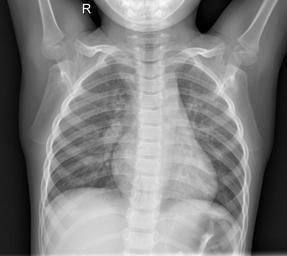

In [117]:
test_image

In [118]:
left_crop = int(math.ceil((test_image.size[0] - 256) / 2))
left_crop

16

In [119]:
right_crop = test_image.size[0] - int(math.floor((test_image.size[0] - 256) / 2))
right_crop

272

In [120]:
left = left_crop
top = 0
right = right_crop
bottom = 256

In [121]:
test_image_cropped = test_image.crop((left, top, right, bottom))

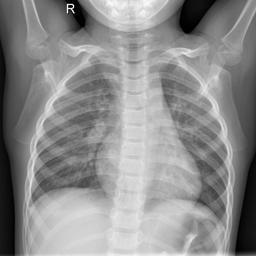

In [122]:
test_image_cropped

In [123]:
test_image_cropped.size

(256, 256)

In [124]:
test_image_array = np.asarray(test_image)

In [125]:
test_image_array_flat = test_image_array.flatten()

In [126]:
test_image_array_flat

array([ 26,  19,  18, ..., 112, 112, 112], dtype=uint8)

In [127]:
test_image_array_flat.shape

(73472,)

In [61]:
train_normal = np.empty(0)

In [62]:
train_normal

array([], dtype=float64)

In [80]:
for file_name in filelist:
    image = Image.open(path + r'/' + file_name)
    img_as_array = np.asarray(image).flatten()
#     np.append(img_as_array, train_normal, axis=0)

(73472,)
(80896,)
(82688,)
(82688,)
(93184,)
(98816,)
(98816,)
(77568,)
(82944,)
(96768,)
(71424,)
(84480,)
(69888,)
(78336,)
(72448,)
(90368,)
(69632,)
(87552,)
(86016,)
(93184,)
(83968,)
(80640,)
(85760,)
(87040,)
(80640,)
(97280,)
(75008,)
(84480,)
(93952,)
(66048,)
(70656,)
(88064,)
(95744,)
(84736,)
(89344,)
(75520,)
(80128,)
(77056,)
(86528,)
(81152,)
(75264,)
(75008,)
(118272,)
(72192,)
(74496,)
(94720,)
(91136,)
(89088,)
(74496,)
(100096,)
(86272,)
(96768,)
(81664,)
(90112,)
(93184,)
(84992,)
(66304,)
(81920,)
(69376,)
(79872,)
(89088,)
(84480,)
(89856,)
(73472,)
(83456,)
(75776,)
(89600,)
(85760,)
(84736,)
(75008,)
(94464,)
(79104,)
(97024,)
(102656,)
(91136,)
(84224,)
(74496,)
(84992,)
(82176,)
(75520,)
(86528,)
(76288,)
(85760,)
(78848,)
(74240,)
(98304,)
(86272,)
(84480,)
(94208,)
(77568,)
(78592,)
(71936,)
(76544,)
(95488,)
(80896,)
(78080,)
(73216,)
(79360,)
(89600,)
(91136,)
(77056,)
(76544,)
(72192,)
(78336,)
(76800,)
(94464,)
(92672,)
(75776,)
(78592,)
(84736,)
(71936,

(89856,)
(79360,)
(72192,)
(88320,)
(75008,)
(83712,)
(67584,)
(77312,)
(78592,)
(81920,)
(67840,)
(73728,)
(83200,)
(90624,)
(70144,)
(73216,)
(76544,)
(87552,)
(69120,)
(84736,)
(96768,)
(72960,)
(66560,)
(81408,)
(67840,)
(80640,)
(82688,)
(103424,)
(87296,)
(71680,)
(77824,)
(79616,)
(83200,)
(79360,)
(88064,)
(79872,)
(65792,)
(78848,)
(83712,)
(87808,)
(76800,)
(73984,)
(84992,)
(78336,)
(65536,)
(81920,)
(79360,)
(84736,)
(79616,)
(77824,)
(89344,)
(77568,)
(78592,)
(70912,)
(81408,)
(68096,)
(75776,)
(87296,)
(75520,)
(80896,)
(77312,)
(74752,)
(81408,)
(77312,)
(85504,)
(79872,)
(74752,)
(72192,)
(74240,)
(75776,)
(82944,)
(88320,)
(75264,)
(95232,)
(69120,)
(70144,)
(73216,)
(83712,)
(77568,)
(79360,)
(84480,)
(75008,)
(82944,)
(82176,)
(80128,)
(84992,)
(79104,)
(85760,)
(109568,)
(72704,)
(77312,)
(76032,)
(88576,)
(93184,)
(76544,)
(83456,)
(75264,)
(84736,)
(72960,)
(74752,)
(90112,)
(81920,)
(82944,)
(90368,)
(72448,)
(80128,)
(80128,)
(90880,)
(86016,)
(74752,)
(72704,)

In [79]:
train_normal

array([], dtype=float64)